In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 

!pip install missingno
import missingno as msno 
from scipy import stats 
import plotly 
import plotly.graph_objs as go 
import plotly.express as px 
from plotly.subplots import make_subplots 
from plotly.offline import iplot, init_notebook_mode

In [2]:
train = pd.read_csv("C://Users/guddu/World Happiness/DATA/World Happiness Report 2022.csv")

DATA INFORMATION: 

In [3]:
train

RANK      Country  Happiness score  Whisker-high  Whisker-low  \
0       1      Finland            7.821         7.886        7.756   
1       2      Denmark            7.636         7.710        7.563   
2       3      Iceland            7.557         7.651        7.464   
3       4  Switzerland            7.512         7.586        7.437   
4       5  Netherlands            7.415         7.471        7.359   
..    ...          ...              ...           ...          ...   
141   142    Botswana*            3.471         3.667        3.275   
142   143      Rwanda*            3.268         3.462        3.074   
143   144     Zimbabwe            2.995         3.110        2.880   
144   145      Lebanon            2.955         3.049        2.862   
145   146  Afghanistan            2.404         2.469        2.339   

     Dystopia (1.83) + residual  Explained by: GDP per capita  \
0                         2.518                         1.892   
1                         2.226                         1.953   
2                         2.320                         1.936   
3                         2.153                         2.026   
4                         2.137                         1.945   
..                          ...                           ...   
141                       0.187                         1.503   
142                       0.536                         0.785   
143                       0.548                         0.947   
144                       0.216                         1.392   
145                       1.263                         0.758   

     Explained by: Social support  Explained by: Healthy life expectancy  \
0                           1.258                                  0.775   
1                           1.243                                  0.777   
2                           1.320                                  0.803   
3                           1.226                                  0.822   
4                           1.206                                  0.787   
..                            ...                                    ...   
141                         0.815                                  0.280   
142                         0.133                                  0.462   
143                         0.690                                  0.270   
144                         0.498                                  0.631   
145                         0.000                                  0.289   

     Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                         0.736                     0.109   
1                                         0.719                     0.188   
2                                         0.718                     0.270   
3                                         0.677                     0.147   
4                                         0.651                     0.271   
..                                          ...                       ...   
141                                       0.571                     0.012   
142                                       0.621                     0.187   
143                                       0.329                     0.106   
144                                       0.103                     0.082   
145                                       0.000                     0.089   

     Explained by: Perceptions of corruption  
0                                      0.534  
1                                      0.532  
2                                      0.191  
3                                      0.461  
4                                      0.419  
..                                       ...  
141                                    0.102  
142                                    0.544  
143                                    0.105  
144                                    0.034  
145                         

Information is presented for 146 countries and 12 indicators of living standards and happiness.

Let's describe our feature space.

RANK - number in the ranking of countries.
Country - researched country.
Happiness score - an index that reflects the well-being of people and the state of the environment in different countries of the world, which was proposed by the New Economics Foundation in July 2006.
Whisker-high and Whisker-low - Whisker (low) is the quartile (real number between 0 and 10) from which the happiness score is calculated.
Dystopia (1.83) + residual - I can not find information in open sources, if someone knows, please tell me :)
Explained by: GDP per capita is the ratio of GDP to the population of the country, which shows how much of the gross product produced in the country in a year and expressed in value terms, falls on one inhabitant of this country.
Explained by: Social support is a form of expression of the social policy of the state, aimed at providing social assistance to needy citizens.
Explained by: Healthy life expectancy - Healthy life expectancy is an indicator for calculating which life expectancy must be adjusted for the health of the individual. This indicator represents the period of time (years, months, days) during which an individual is expected to have a certain state of health, with a constant level of mortality and morbidity.
Explained by: Freedom to make life choices - the right of a person to freely express his opinion. This right includes freedom to hold opinions and freedom to receive and impart information and ideas without any interference from public authorities and regardless of frontiers.
Explained by: Generosity - The main feature of charity is the voluntary choice of the type, time and place, as well as the content of (targeted) assistance. Charity is distinguished as a manifestation of compassion for one's neighbor and the moral duty of the possessor to rush to the aid of the have-not.
Explained by: Perceptions of corruption - an index compiled by the international non-governmental organization Transparency International to reflect the assessment of the level of perception of corruption by analysts and entrepreneurs on a 100-point scale. Compiled annually since 1995.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   RANK                                        146 non-null    int64  
 1   Country                                     146 non-null    object 
 2   Happiness score                             146 non-null    float64
 3   Whisker-high                                146 non-null    float64
 4   Whisker-low                                 146 non-null    float64
 5   Dystopia (1.83) + residual                  146 non-null    float64
 6   Explained by: GDP per capita                146 non-null    float64
 7   Explained by: Social support                146 non-null    float64
 8   Explained by: Healthy life expectancy       146 non-null    float64
 9   Explained by: Freedom to make life choices  146 non-null    float64
 10  Explained by: 

In [5]:
train.drop('RANK', axis = 1, inplace = True)

In [6]:
train.describe().style.background_gradient(cmap = "RdPu")

EXPLORATORY DATA ANALYSIS 

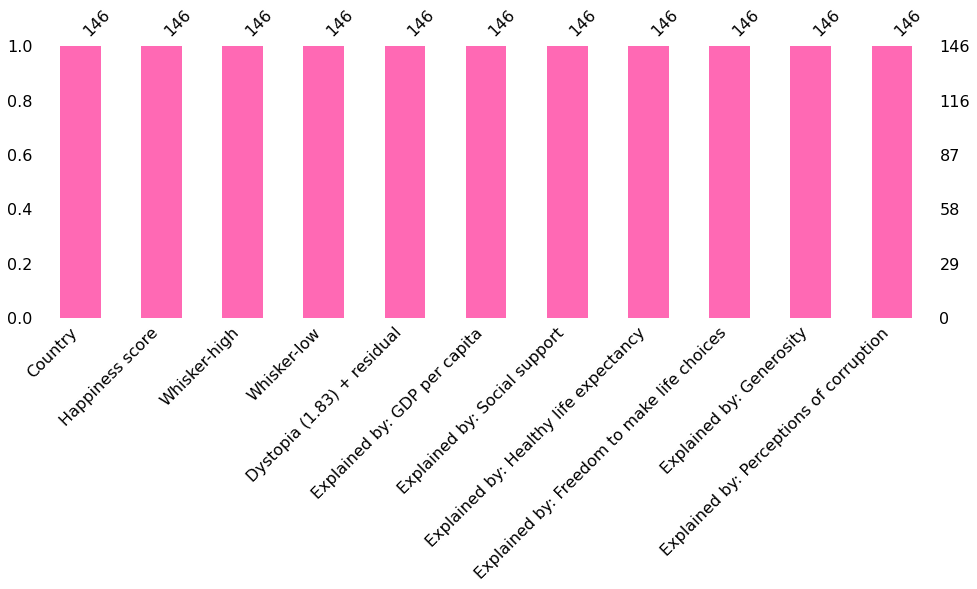

In [7]:
msno.bar(train, figsize = (16,5), color = "#FF69B4")
plt.show()

Great! There are no missing values in the data 

Now first, let me visualise the entire dataset completely and then I will process to the analysis of the dependencies that we are interested in. 

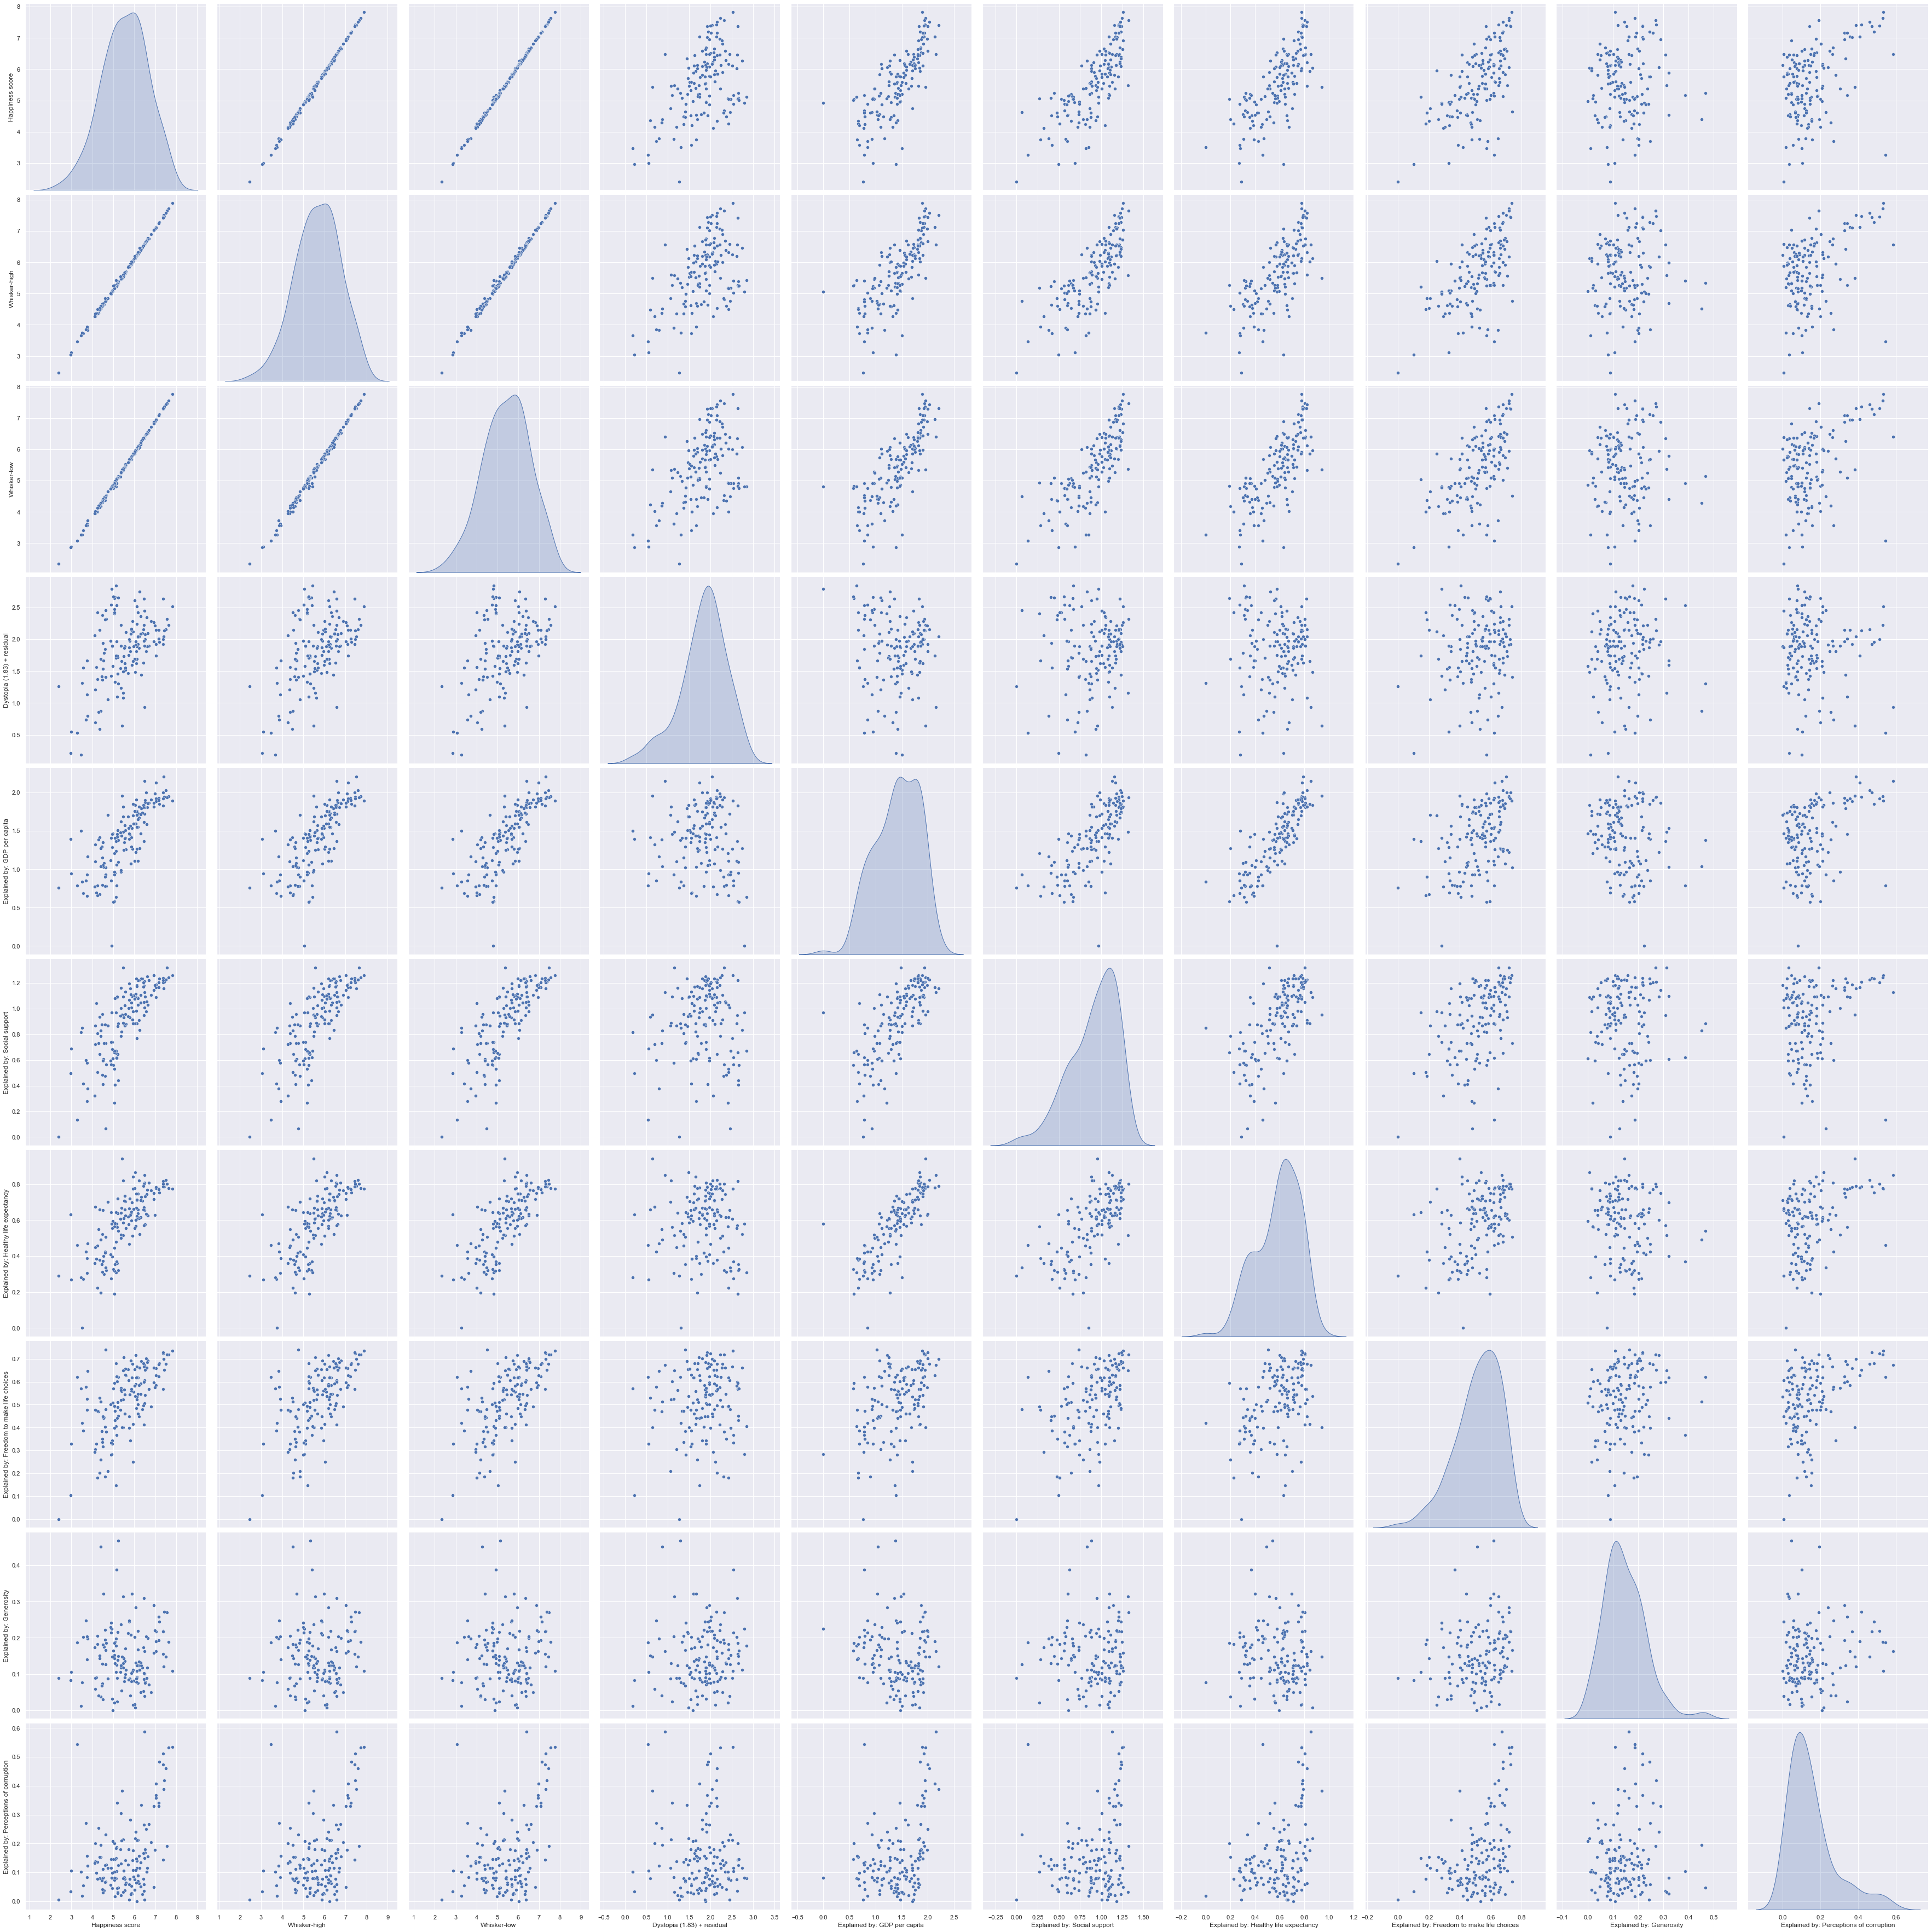

In [8]:
sns.set()
sns.pairplot(train, height = 5, kind = 'scatter', diag_kind = 'kde')
plt.show()

As we can see, most features seem to have a positive correlation with the target variable. 
Hypothesis: There is a multicollinearity in the dataset. 
    
    
    Let's do a quick analysis of the numerical variables and draw some conclusions from it. 

In [9]:
train.columns

Index(['Country', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'],
      dtype='object')

In [10]:
numeric_features=['Happiness score', 'Whisker-high', 'Whisker-low',
                  'Dystopia (1.83) + residual', 'Explained by: GDP per capita', 
                  'Explained by: Social support', 'Explained by: Healthy life expectancy', 
                  'Explained by: Freedom to make life choices', 'Explained by: Generosity', 
                  'Explained by: Perceptions of corruption']

In [11]:
fig = make_subplots(rows=len(numeric_features), cols=3)
i=1
for feature in numeric_features:
  fig.add_trace(go.Histogram(x=train[feature], name=feature), row=i, col=1)
  fig.add_trace(go.Box(x=train[feature], name=feature), row=i, col=2)
  fig.add_trace(go.Violin(x=train[feature], name=feature), row=i, col=3)
  i+=1
fig.update_layout(height=2400, width=1800, title_text='<b>Continuos distributions', title_x=0.5)
fig.show()

Hypothesis: Most of the data are not distributed according to normal distribution law, and there are also minor outlier for each of the features. 

Let's visualise the top 5 countries according to our numerical features. 

In [12]:
for feature in numeric_features: 
    top5 = train.nlargest(5,feature).sort_values(by=feature)
    fig_bar = px.bar(x = top5['Country'], y = top5[feature])
    fig_bar.update_layout(width = 1000, height = 500, title_text = f"Top 5 countries by {feature}")
    fig_bar.update_xaxes(title = 'Country')
    fig_bar.update_yaxes(title = f'{feature}')
    fig_bar.show()

In [13]:
for feature in numeric_features: 
    fig = px.scatter(train, x = 'Happiness score', y = feature)
    fig.update_layout(title = f'Scatter plot Happiness Score with {feature}')
    fig.show()

Hypothesis: Happiness score and Whisker signs are multicollinear. 
    
I want to visualise my indicators on the map now. 

In [14]:
train.columns

Index(['Country', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'],
      dtype='object')

In [15]:
for feature in numeric_features:
  data = dict(type='choropleth',
  locations = train['Country'],
  locationmode = 'country names', z = train[feature],
  text = train['Country'], colorbar = {'title':f'{feature}'},
  colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
  reversescale = False)
  layout = dict(title=f'Visualization of the parameter {feature} on the map',geo = dict(showframe = True))
  choromap = go.Figure(data = [data], layout = layout)
  iplot(choromap, validate=False)
    

Well, here we see that in most cases in developed countries the standard of living is very high in various indicators. 

I am moving on to mini-statistical tests now. 

STATISTICAL TESTS: 

In [16]:
fig = px.imshow(train.corr(), text_auto = True, color_continuous_scale = px.colors.sequential.Plotly3, aspect = 'auto', title = '<b>Correlation Matrix')
fig.update_layout(title_x=0.5)
fig.show()

The hypothesis about the multicollinearity feature was proved right. 

I am going to remove the whiskers features and move on to the machine learning aspect. 

In [17]:
train.drop(['Whisker-low', 'Whisker-high'],axis=1, inplace = True)

In [18]:
train.drop('Country', axis = 1, inplace = True)

MACHINE LEARNING: 

In [19]:
from sklearn import ensemble, tree, linear_model

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, KFold, GridSearchCV 
from sklearn.linear_model import LinearRegression, ElasticNet 
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error 
import xgboost as xgb 
from sklearn.ensemble import RandomForestRegressor

In [20]:
y = train['Happiness score']
x = train.drop(['Happiness score'], axis = 1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)

In [22]:
df_models = pd.DataFrame(data = None, columns = ['Algorithm', 'MSE', 'MAE'])

def make_model(X_tr, X_te, y_tr, y_te, model, model_name : str): 
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    MSE = mean_squared_error(y_te, y_pred)
    MAE = mean_absolute_error(y_te, y_pred)
    df_models.loc[len(df_models.index)] = [model_name, MSE, MAE]

In [23]:
models = [RandomForestRegressor(), ElasticNet(), KNeighborsRegressor(), xgb.XGBRegressor()]

In [24]:
for model in models: 
    make_model(X_train, X_test, y_train, y_test, model, f'{model}'[:10])

In [25]:
fig = go.Figure(data = [
    go.Bar(name = 'MSE', x=df_models.Algorithm, y=df_models.MSE), 
    go.Bar(name = 'MAE', x=df_models.Algorithm, y=df_models.MAE)
])

fig.update_layout(height = 900, width = 1400, title = 'MAE and MSE for diferent models', title_x = 0.5)

Gradient boosting on trees did the best job with this task. 

I will run it's hyperparameters using the optuna library. 

In [26]:
import optuna

In [27]:
def objective(trial,data=x,target=y):
    train_x, test_x, train_y, test_y=train_test_split(x,y,test_size=0.1,random_state=42)

    param = {
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.01,0.012,0.014,0.016,0.018, 0.02]),
        'n_estimators': 10000,
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17]),
        'random_state': trial.suggest_categorical('random_state', [2020]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model = xgb.XGBRegressor(**param)  
    
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=100,verbose=False)
    
    preds = model.predict(test_x)
    
    mse = mean_squared_error(test_y, preds)
    
    return mse

In [28]:
study = optuna.create_study(direction = 'minimize')
study.optimize(objective, n_trials = 30)
print('Number of final trial:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2022-09-12 14:16:53,153] A new study created in memory with name: no-name-51ab44de-bd47-43ad-bb83-85211e0717c1
<ipython-input-27-850f4b44e643>:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-27-850f4b44e643>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\guddu\conda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

[I 2022-09-12 14:16:53,291] Trial 0 finished with value: 27.082467999999995 and parameters: {'lambda': 0.018801449128101628, 'alpha'

[I 2022-09-12 14:16:56,877] Trial 7 finished with value: 1.1549906611817489 and parameters: {'lambda': 0.0016140335601990592, 'alpha': 0.17626013524909784, 'colsample_bytree': 1.0, 'subsample': 0.6, 'learning_rate': 0.012, 'max_depth': 5, 'random_state': 2020, 'min_child_weight': 66}. Best is trial 6 with value: 0.1981918165064485.
<ipython-input-27-850f4b44e643>:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-27-850f4b44e643>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\guddu\conda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility

[I 2022-09-12 14:17:37,304] Trial 15 finished with value: 1.1567245430171034 and parameters: {'lambda': 7.921610543309893, 'alpha': 2.273421179220285, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.01, 'max_depth': 13, 'random_state': 2020, 'min_child_weight': 57}. Best is trial 14 with value: 0.047143407324247794.
<ipython-input-27-850f4b44e643>:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-27-850f4b44e643>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\guddu\conda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility w

[I 2022-09-12 14:17:51,420] Trial 23 finished with value: 0.02439420955048018 and parameters: {'lambda': 1.3710999604088285, 'alpha': 0.0304954668235774, 'colsample_bytree': 0.6, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 4}. Best is trial 21 with value: 0.02221488679155362.
<ipython-input-27-850f4b44e643>:5: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

<ipython-input-27-850f4b44e643>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

C:\Users\guddu\conda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility 

Number of final trial: 30
Best trial: {'lambda': 4.240774716864822, 'alpha': 0.06720540166946162, 'colsample_bytree': 0.6, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 3}


In [29]:
from optuna import visualization 
print('Best trial: MSE = {}, \nparams {}'.format(study.best_trial.value, study.best_trial.params))
hist = study.trials_dataframe()
hist.head()

Best trial: MSE = 0.02221488679155362, 
params {'lambda': 4.240774716864822, 'alpha': 0.06720540166946162, 'colsample_bytree': 0.6, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 3}


number      value             datetime_start          datetime_complete  \
0       0  27.082468 2022-09-12 14:16:53.156753 2022-09-12 14:16:53.290394   
1       1  27.082468 2022-09-12 14:16:53.293386 2022-09-12 14:16:53.431018   
2       2  27.082468 2022-09-12 14:16:53.434010 2022-09-12 14:16:53.579621   
3       3  27.082468 2022-09-12 14:16:53.581615 2022-09-12 14:16:53.722239   
4       4  27.082468 2022-09-12 14:16:53.725230 2022-09-12 14:16:53.862862   

         duration  params_alpha  params_colsample_bytree  params_lambda  \
0 00:00:00.133641      1.069863                      0.7       0.018801   
1 00:00:00.137632      0.290007                      0.4       0.002037   
2 00:00:00.145611      0.003990                      0.4       2.985524   
3 00:00:00.140624      0.017100                      0.9       0.138040   
4 00:00:00.137632      0.001081                      0.6       0.101109   

   params_learning_rate  params_max_depth  params_min_child_weight  \
0                 0.020                 9                      172   
1                 0.018                15                      193   
2                 0.008                 7                      278   
3                 0.016                 5                      143   
4                 0.008                 7                      229   

   params_random_state  params_subsample     state  
0                 2020               0.8  COMPLETE  
1                 2020               0.5  COMPLETE  
2                 2020               0.7  COMPLETE  
3                 2020               0.6  COMPLETE  
4                 2020               0.4  COMPLETE

In [30]:
optuna.visualization.plot_slice(study)

In [31]:
optuna.visualization.plot_optimization_history(study)

In [32]:
optuna.visualization.plot_parallel_coordinate(study)

In [33]:
optuna.visualization.plot_param_importances(study)

Great, the best model hyperparameters have been found. 
I am going to try to cluster using k-means method. As I have all signs of the same dimension, it is not necessary to normalise them 

In [34]:
train1 = pd.read_csv('C://Users/guddu/World Happiness/DATA/World Happiness Report 2022.csv')

In [35]:
train1 = train1.drop(['RANK'], axis=1)

In [36]:
from sklearn.cluster import KMeans

In [37]:
train1 = train1.drop('Country', axis=1)

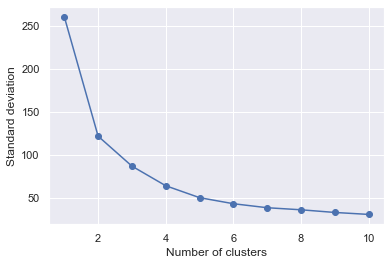

In [38]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(train)
    wcss.append(km.inertia_)
fig, ax = plt.subplots()

ax.plot(range(1,11),wcss,'-o')

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Standard deviation')

plt.show()

In [39]:
X = train1.iloc[:,:].values
km = KMeans(n_clusters = 4)
y_means = km.fit_predict(X)

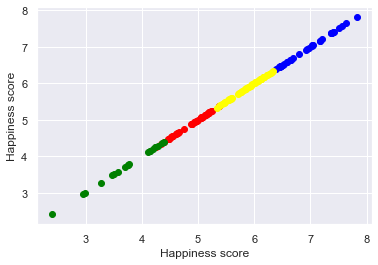

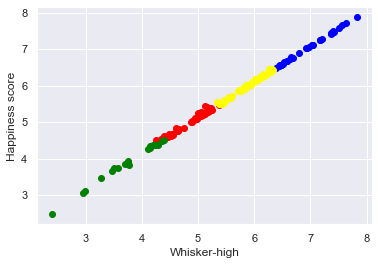

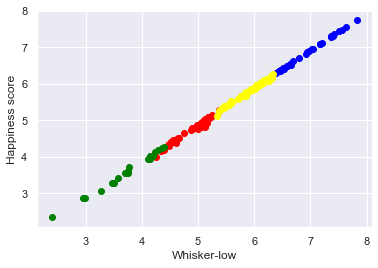

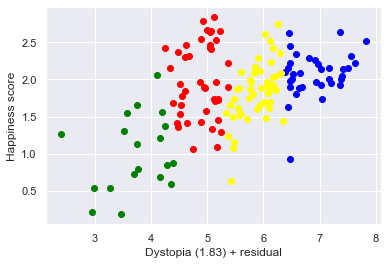

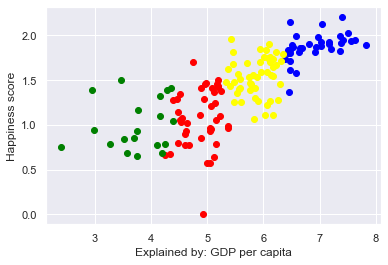

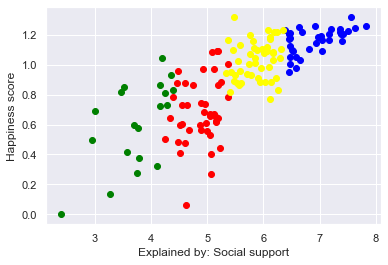

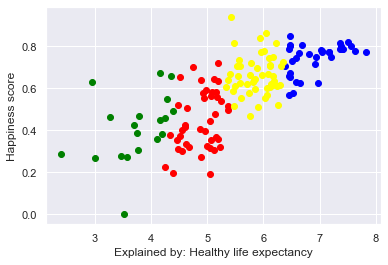

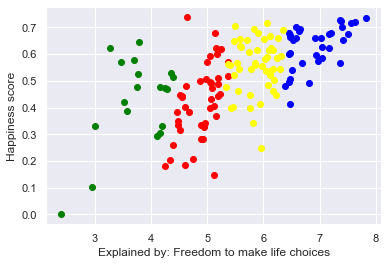

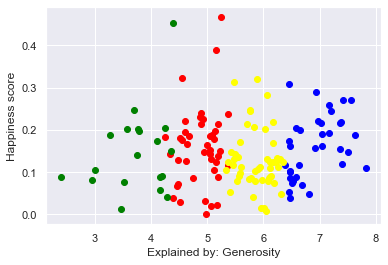

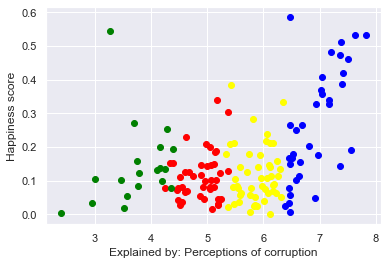

In [40]:
i = 0 
for column in train1.columns: 
    plt.scatter(X[y_means ==0,0], X[y_means==0,i], color = 'red')
    plt.scatter(X[y_means ==1,0], X[y_means==1,i], color = 'blue')
    plt.scatter(X[y_means ==2,0], X[y_means==2,i], color = 'yellow')
    plt.scatter(X[y_means ==3,0], X[y_means==3,i], color = 'green')
    plt.xlabel(column)
    plt.ylabel('Happiness score')
    plt.show()
    i+=1

Based on the visualization, we can conclude that all countries are best divided into 4 clusters. 

CONCLUSIONS: 

-In order to be able to enjoy life, you need to be in it mentally. The only way to live life is to be in the present moment. If you have not experienced positive emotions for a long time, then you are probably living in situations from the past often - proving something to someone, still angry, ashamed or feeling guilt, gnaw at yourself for the fact that "it was necessary then to say differently." Or you live in the expected future - you are afraid, anxious about possible changes, or, conversely, you live in anticipation of when they will happen. In this way, you do not live your life - you avoid it, depriving you of the opportunity to experience the emotions of the present moment.
-Most people, when they want to shake things up, experience some emotions, feel better, they choose a surrogate for emotions in the form of delicious food, alcohol, a series, a movie, a book, funny videos in the social network feed. All of these are ways to quickly get emotions through escape from reality. This is a good way to feel better, because it is guaranteed and fast, but it allows you not to enjoy life, but rather, on the contrary, to get away from it and enjoy something that has nothing to do with your immediate reality. It, just like mentally hanging in the past and future, allows you to escape from the problems of the present and create for yourself, albeit artificial, but guaranteed joy.
-After getting rid of triggers from the past, starting to live in the present and not running into surrogates of positive emotions, you will need to learn again and again to fill your life with new, now real emotions, and lead a rich life. It will really be necessary - in all other cases, you run the risk of falling back into the pit of artificial happiness.